In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
X,y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

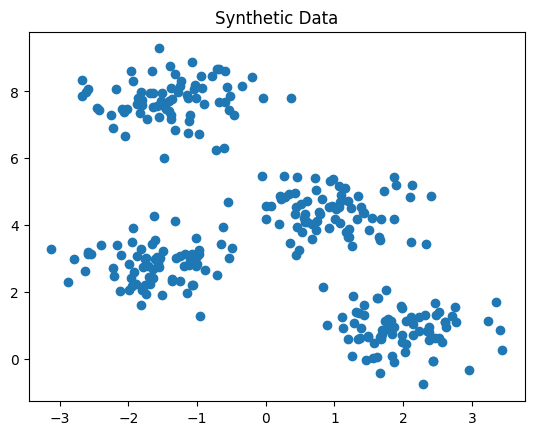

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.title('Synthetic Data')
plt.show()

In [4]:
inertia =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [5]:
inertia

[2812.137595303235,
 1439.861395200539,
 546.8911504626299,
 212.00599621083478,
 194.96601623554272,
 177.8689948217671,
 164.9562143191074,
 143.96669359684986,
 133.6180436385599,
 116.00599732388082]

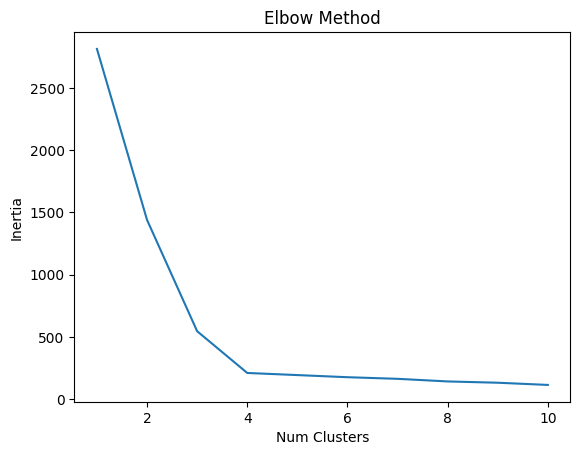

In [6]:
plt.plot(range(1,11), inertia)
plt.title('Elbow Method')
plt.xlabel('Num Clusters')
plt.ylabel('Inertia')
plt.show()

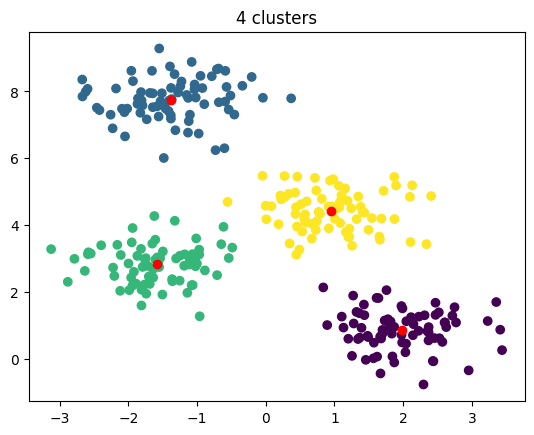

In [12]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels=kmeans.labels_
centers = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], c='red')
plt.title('4 clusters')
plt.show()

In [14]:
import pandas as pd
df = pd.DataFrame(X)
df['label'] = labels
df

,0,1,label
0,0.836857,2.136359,0
1,-1.413658,7.409623,1
2,1.155213,5.099619,3
3,-1.018616,7.814915,1
4,1.271351,1.892542,0
...,...,...,...
295,1.973698,1.579798,0
296,2.518342,1.391766,0
297,0.438990,4.535929,3
298,0.369479,7.791105,1


In [15]:
labels

array([0, 1, 3, 1, 0, 0, 2, 3, 1, 1, 2, 1, 3, 1, 0, 3, 3, 0, 2, 2, 0, 0,
       3, 2, 2, 3, 0, 3, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 0, 3, 2, 3, 3,
       2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 3, 1, 2, 2, 2,
       1, 0, 1, 2, 3, 2, 1, 2, 2, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 0, 3,
       1, 1, 3, 0, 1, 2, 2, 3, 0, 0, 3, 2, 1, 0, 1, 0, 3, 0, 0, 3, 1, 3,
       2, 2, 0, 1, 0, 3, 1, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 2, 2, 1, 3, 1, 1, 2, 3, 2, 3, 2, 1, 3, 1, 1, 1, 3, 1, 3,
       0, 2, 1, 2, 0, 3, 1, 3, 3, 0, 3, 2, 2, 3, 0, 3, 3, 1, 0, 3, 2, 1,
       0, 0, 3, 2, 0, 3, 2, 2, 3, 3, 3, 3, 0, 1, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 1, 3, 2, 0, 2, 3, 1, 2, 1, 3, 1, 3, 2, 3, 3, 1, 2, 2, 0, 0, 3,
       1, 0, 0, 2, 0, 2, 3, 1, 1, 3, 3, 1, 3, 0, 2, 3, 0, 2, 1, 2, 0, 3,
       0, 1, 1, 1, 1, 2, 2, 1, 3, 2, 0, 3, 2, 2, 2, 0, 0, 1, 3, 3, 2, 0,
       1, 2, 3, 1, 3, 0, 0, 2, 2, 3, 0, 0, 0, 3, 1, 1, 0, 0, 3, 0, 0, 0,
       1, 2, 1, 3, 0, 0, 1, 1, 1, 0, 0, 3, 1, 2], d

In [16]:
sil_score = silhouette_score(X, labels)
print(sil_score)

0.6819938690643478


In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

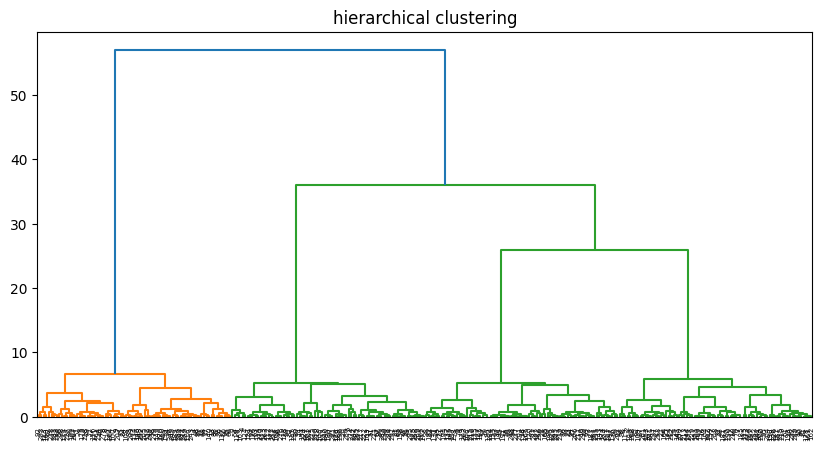

In [18]:
Z = linkage(X, method='ward')
plt.figure(figsize=(10,5))
dendrogram(Z)
plt.title('hierarchical clustering')
plt.show()

In [20]:
from scipy.cluster.hierarchy import fcluster


In [26]:
clusters = fcluster(Z, t=5, criterion='distance')

In [27]:
clusters

array([3, 2, 8, 1, 3, 5, 6, 9, 1, 1, 7, 2, 9, 2, 4, 9, 9, 5, 7, 6, 5, 5,
       8, 7, 6, 8, 5, 8, 7, 8, 1, 2, 9, 2, 2, 2, 2, 2, 6, 3, 9, 6, 8, 9,
       6, 7, 1, 7, 2, 5, 7, 5, 1, 3, 3, 7, 1, 6, 2, 3, 2, 9, 1, 7, 7, 7,
       2, 5, 2, 7, 9, 7, 1, 7, 6, 1, 7, 9, 5, 1, 4, 9, 3, 5, 1, 8, 5, 8,
       2, 2, 9, 5, 1, 7, 7, 9, 3, 5, 8, 7, 1, 4, 1, 5, 9, 5, 4, 9, 2, 8,
       6, 7, 3, 1, 3, 9, 2, 3, 3, 8, 7, 3, 7, 3, 3, 5, 3, 6, 3, 6, 1, 6,
       6, 4, 2, 6, 7, 2, 9, 1, 2, 7, 9, 7, 9, 6, 2, 8, 2, 2, 2, 9, 2, 8,
       4, 7, 1, 6, 5, 9, 1, 9, 9, 3, 8, 7, 6, 8, 3, 9, 9, 1, 3, 9, 7, 1,
       5, 5, 9, 7, 5, 9, 6, 7, 8, 9, 8, 9, 5, 2, 9, 7, 9, 9, 6, 6, 7, 9,
       6, 2, 9, 7, 4, 6, 9, 2, 7, 1, 9, 2, 9, 7, 8, 9, 2, 6, 6, 5, 4, 9,
       2, 5, 5, 7, 4, 7, 9, 1, 1, 9, 9, 1, 9, 3, 7, 9, 5, 7, 1, 7, 5, 8,
       5, 2, 2, 2, 2, 7, 7, 2, 9, 7, 3, 8, 7, 7, 7, 5, 5, 2, 9, 8, 7, 3,
       1, 7, 9, 1, 8, 5, 3, 7, 6, 9, 5, 4, 3, 9, 1, 2, 5, 5, 9, 5, 5, 5,
       2, 7, 1, 9, 4, 5, 2, 1, 1, 5, 5, 8, 1, 7], d

In [28]:
# t=5 in this case means we want to create 5 clusters
clusters = fcluster(Z, t=5, criterion='maxclust')

In [29]:
clusters

array([3, 2, 5, 1, 3, 3, 4, 5, 1, 1, 4, 2, 5, 2, 3, 5, 5, 3, 4, 4, 3, 3,
       5, 4, 4, 5, 3, 5, 4, 5, 1, 2, 5, 2, 2, 2, 2, 2, 4, 3, 5, 4, 5, 5,
       4, 4, 1, 4, 2, 3, 4, 3, 1, 3, 3, 4, 1, 4, 2, 3, 2, 5, 1, 4, 4, 4,
       2, 3, 2, 4, 5, 4, 1, 4, 4, 1, 4, 5, 3, 1, 3, 5, 3, 3, 1, 5, 3, 5,
       2, 2, 5, 3, 1, 4, 4, 5, 3, 3, 5, 4, 1, 3, 1, 3, 5, 3, 3, 5, 2, 5,
       4, 4, 3, 1, 3, 5, 2, 3, 3, 5, 4, 3, 4, 3, 3, 3, 3, 4, 3, 4, 1, 4,
       4, 3, 2, 4, 4, 2, 5, 1, 2, 4, 5, 4, 5, 4, 2, 5, 2, 2, 2, 5, 2, 5,
       3, 4, 1, 4, 3, 5, 1, 5, 5, 3, 5, 4, 4, 5, 3, 5, 5, 1, 3, 5, 4, 1,
       3, 3, 5, 4, 3, 5, 4, 4, 5, 5, 5, 5, 3, 2, 5, 4, 5, 5, 4, 4, 4, 5,
       4, 2, 5, 4, 3, 4, 5, 2, 4, 1, 5, 2, 5, 4, 5, 5, 2, 4, 4, 3, 3, 5,
       2, 3, 3, 4, 3, 4, 5, 1, 1, 5, 5, 1, 5, 3, 4, 5, 3, 4, 1, 4, 3, 5,
       3, 2, 2, 2, 2, 4, 4, 2, 5, 4, 3, 5, 4, 4, 4, 3, 3, 2, 5, 5, 4, 3,
       1, 4, 5, 1, 5, 3, 3, 4, 4, 5, 3, 3, 3, 5, 1, 2, 3, 3, 5, 3, 3, 3,
       2, 4, 1, 5, 3, 3, 2, 1, 1, 3, 3, 5, 1, 4], d

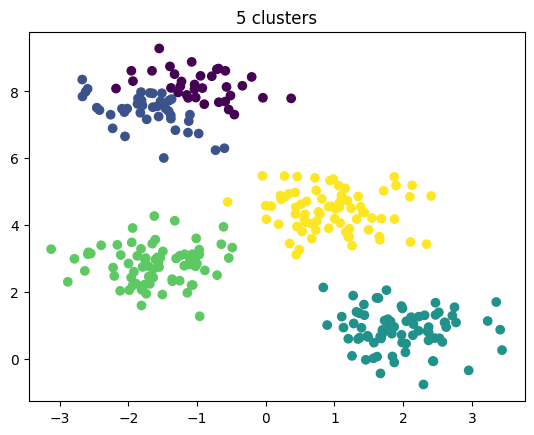

In [31]:
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.title('5 clusters')
plt.show()

In [32]:
sil_score = silhouette_score(X, clusters)
print(sil_score)

0.5875473435823221


In [33]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels=dbscan.fit_predict(X)

In [34]:
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(X, dbscan_labels)
    print(dbscan_sil_score)

0.6303800996842716


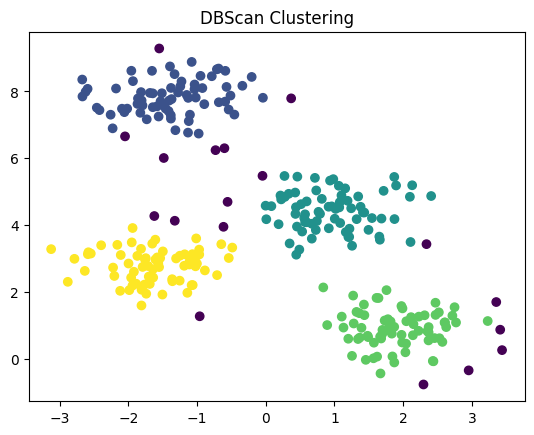

In [38]:
plt.scatter(X[:,0],X[:,1], c=dbscan_labels)
plt.title('DBScan Clustering')
plt.show()

In [87]:
import fileinput
with fileinput.FileInput('/Users/Sam/Downloads/assignment2-data/LD2011_2014.txt', inplace=True) as file:
    for line in file:
        print(line.replace(",","."), end='')

In [88]:
df = pd.read_csv('/Users/Sam/Downloads/assignment2-data/LD2011_2014.txt', sep=';', index_col=0)

In [89]:
sample = df.loc['2012-01-01 00:15:00':'2012-01-03 00:00:00'][['MT_001','MT_002']]

<Axes: >

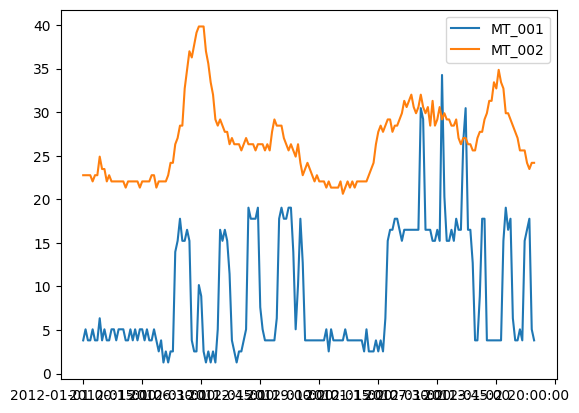

In [90]:
sample.plot()

In [91]:
data2011 = df.loc['2011-01-01 00:15:00':'2012-01-01 00:00:00']
data2012 = df.loc['2012-01-01 00:15:00':'2013-01-01 00:00:00']
data2013 = df.loc['2013-01-01 00:15:00':'2014-01-01 00:00:00']
data2014 = df.loc['2014-01-01 00:15:00':'2015-01-01 00:00:00']

In [92]:
clients = data2011.columns
clients_no_demand = clients[data2013.mean()==0]
data_13_14 = pd.concat([data2013,data2014], axis=0)
data_13_14 = data_13_14.drop(clients_no_demand, axis=1)

In [93]:
df['hour'] = df.index.map(lambda x: x[11:])

In [94]:
datagroup = df.groupby('hour')
avg_curves = datagroup.agg('mean')
avg_curves.shape

(96, 370)

In [95]:
avg_curves_norm = avg_curves / (avg_curves.mean())

<Axes: xlabel='hour'>

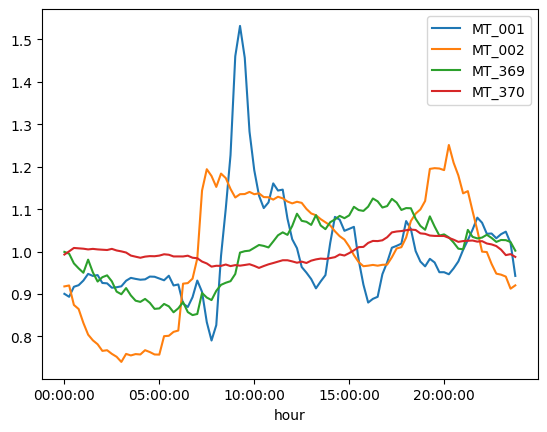

In [96]:
avg_curves_norm[['MT_001','MT_002','MT_369','MT_370']].plot()

In [97]:
import numpy as np
X = avg_curves_norm.copy()
X = np.array(X.T)

In [98]:
def getInertia(X,kmeans):
    inertia = 0
    for J in range(len(X)):
        inertia = inertia + np.linalg.norm(X[J] - kmeans.cluster_centers_[kmeans.labels_[J]])**2
    return inertia

In [99]:
inertia_1 = []
silhouette_avgs = []
max_K = 15
for k in np.arange(1,max_K+1):
    kmeans=KMeans(n_clusters=k, random_state=0).fit(X)
    inertia_1 = inertia_1 + [kmeans.inertia_]
    if k>1:
        silhouette_avgs = silhouette_avgs + [silhouette_score(X,kmeans.labels_)]

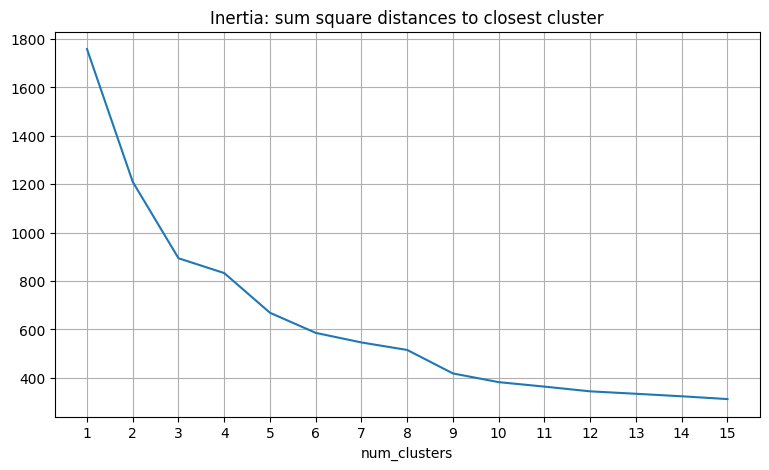

In [100]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title('Inertia: sum square distances to closest cluster')
plt.plot(np.arange(1,max_K+1), inertia_1)
plt.xticks(np.arange(1,max_K+1))
plt.xlabel('num_clusters')
plt.grid()

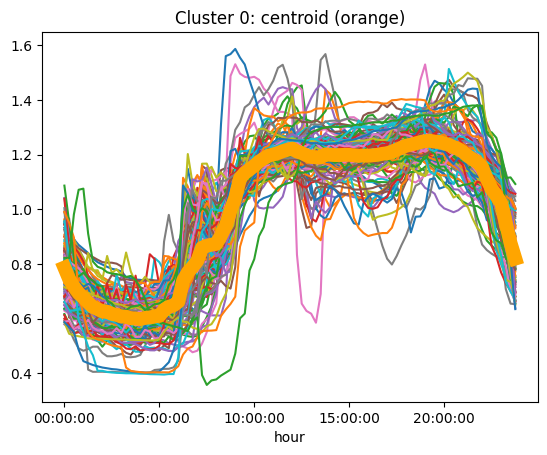

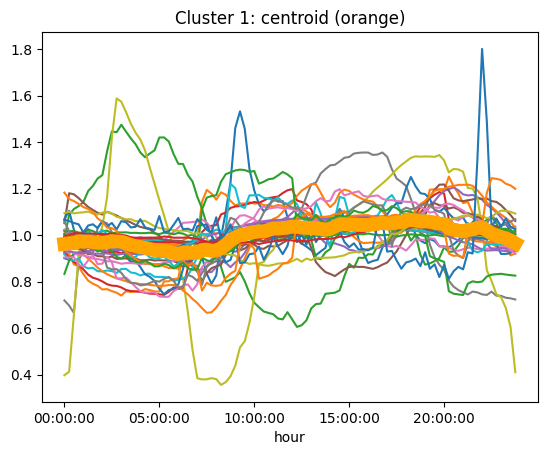

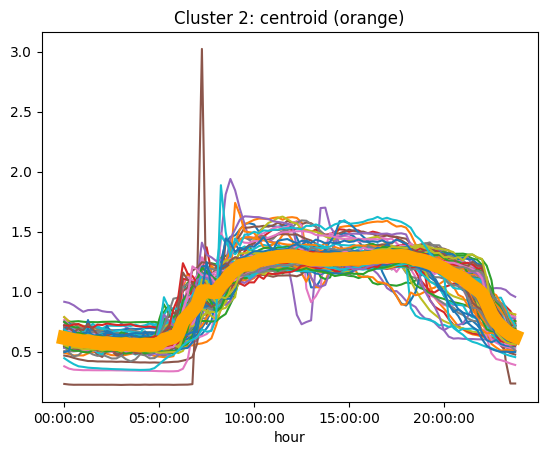

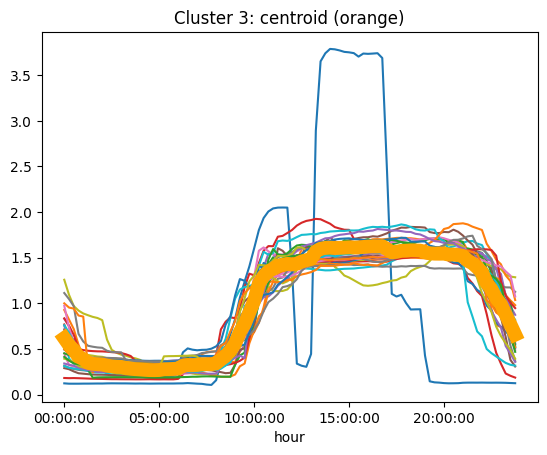

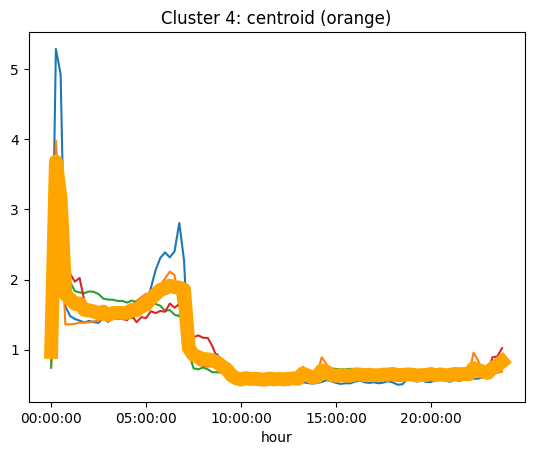

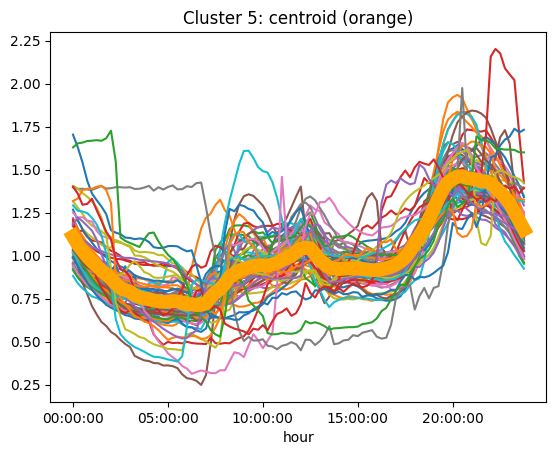

In [101]:
K = 6
kmeans = KMeans(n_clusters=K, random_state=0).fit(X)
for c in range(K):
    avg_curves_norm.T[kmeans.labels_ == c].T.plot(legend=False)
    plt.plot(kmeans.cluster_centers_[c], linewidth=10, color='orange')
    plt.title('Cluster '+str(c)+": centroid (orange)")
    plt.show()